<a href="https://colab.research.google.com/github/descaharefa/Analisis-Algoritma-K-Means-dan-Apriori/blob/main/Analisis_K_Means%26Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CODINGAN GABUNGAN ALGORITMA K-MEANS & APRIORI**
*******************************************************

**Langkah Pertama Impor library yang diperlukan**

Impor library pada pemrograman memungkinkan kita untuk mengakses kumpulan fungsi dan fitur yang telah dibuat dan diatur sedemikian rupa untuk membantu pemrograman dalam mengembangkan aplikasi atau program. Dalam konteks analisis data dan machine learning, kita memerlukan beberapa library seperti pandas, sklearn, dan matplotlib.
- Pandas --> library yang digunakan untuk memanipulasi dan menganalisis data dalam bentuk dataframe
- Sklearn (Scikit-learn} --> library yang menyediakan algoritma dan fungsi untuk melakukan machine learning, seperti regresi, klasifikasi, dan clustering
- Matplotlib --> library yang digunakan untuk membuat visualisasi grafik dan plot dari data

In [ ]:
# Impor Library
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

**Langkah Kedua Load data Transaksi Penjualan ke dalam DataFrame**

Fungsi dari load data transaksi penjualan ke dalam DataFrame yaitu untuk mempermudah analisis data dan pemrosesan data selanjutnya. Dalam bentuk DataFrame, data transaksi penjualan dapat diorganisir ke dalam kolom-kolom dan baris-baris, sehingga memudahkan kita dalam melakukan manipulasi dan analisis data.

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/toyota.csv')

**Langkah Ketiga Membuat DataFrame baru untuk variabel yang akan digunakan dalam clustering, misalnya pada dataset "quantity" dan "price"**

Tujuannya pada penelitian ini untuk mempersiapkan data agar dapat digunakan dalam proses clustering dengan algoritma K-Means.

In [ ]:
# DataFrame Baru
df_cluster = df[['price', 'mileage']]

In [ ]:
print(df)

               model  year  price transmission  mileage fuelType  tax   mpg  \
0               GT86  2016  16000       Manual    24089   Petrol  265  36.2   
1               GT86  2017  15995       Manual    18615   Petrol  145  36.2   
2               GT86  2015  13998       Manual    27469   Petrol  265  36.2   
3               GT86  2017  18998       Manual    14736   Petrol  150  36.2   
4               GT86  2017  17498       Manual    36284   Petrol  145  36.2   
...              ...   ...    ...          ...      ...      ...  ...   ...   
6733              IQ  2011   5500    Automatic    30000   Petrol   20  58.9   
6734   Urban Cruiser  2011   4985       Manual    36154   Petrol  125  50.4   
6735   Urban Cruiser  2012   4995       Manual    46000   Diesel  125  57.6   
6736   Urban Cruiser  2011   3995       Manual    60700   Petrol  125  50.4   
6737   Urban Cruiser  2011   4495       Manual    45128   Petrol  125  50.4   

      engineSize  
0            2.0  
1            

**Langkah Keempat Menstandarkan skala variabel dalam DataFrame menggunakan StandardScaler dari library scikit-learn (Data Pre-processing)**

Hal ini dilakukan dengan mengubah nilai-nilai dalam variabel menjadi memiliki mean (rerata) sebesar 0 dan standar deviasi sebesar 1. Dalam beberapa kasus, seperti pada algoritma Machine Learning seperti k-means clustering, perbedaan skala variabel dapat mempengaruhi hasil akhir. Variabel dengan skala yang lebih besar dapat mempengaruhi hasil lebih banyak dibandingkan dengan variabel yang memiliki skala lebih kecil. Dengan menstandarkan skala variabel, kita dapat menghindari masalah ini dan memastikan bahwa setiap variabel memiliki pengaruh yang seimbang pada hasil akhir.

In [ ]:
# Standar Skala Variabel
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

**Langkah Kelima Melakukan clustering menggunakan algoritma K-Means dengan jumlah klaster yang telah ditentukan (Transformasi Data)**

Fungsi dari melakukan clustering menggunakan algoritma K-Means dengan jumlah klaster yang telah ditentukan adalah untuk mengelompokkan data ke dalam beberapa kelompok yang homogen atau serupa berdasarkan fitur-fitur yang dimiliki oleh data tersebut. Dalam kasus tertentu, kita mungkin sudah mengetahui berapa jumlah klaster yang ideal untuk data yang kita miliki, sehingga kita dapat menggunakan jumlah klaster tersebut untuk melakukan clustering dengan algoritma K-Means.


In [ ]:
# Melakukan Clustering
kmeans = KMeans(n_clusters=9, init='k-means++', random_state=42)
kmeans.fit(df_cluster_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9, random_state=42)

**Langkah Keenam Menambahkan kolom "cluster" ke dalam DataFrame asli untuk menunjukkan klaster mana yang ditugaskan untuk setiap transaksi**

FUngsinya untuk menunjukkan klaster mana yang ditugaskan untuk setiap transaksi berguna untuk memudahkan analisis dan pemahaman terhadap data tersebut.

In [ ]:
# Menambahkan Kolom Klaster
df['cluster'] = kmeans.labels_

**Langkah Ketujuh Visualisasi hasil clustering menggunakan scatter plot**

Fungsinya untuk memvisualisasikan hasil clustering secara grafis dengan membagi data ke dalam beberapa kelompok atau klaster yang berbeda.

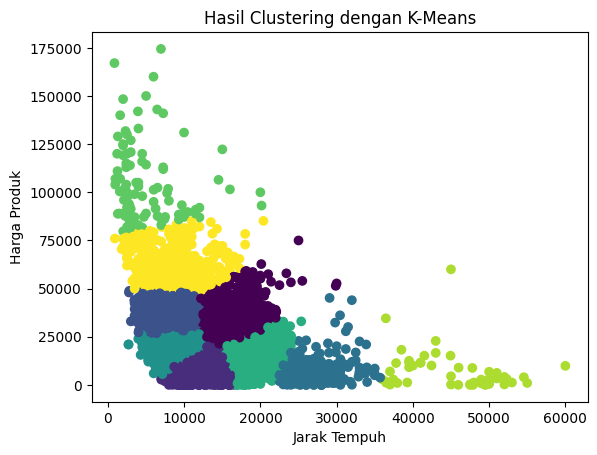

In [ ]:
# Visualisasi Hasil Clustering dengan jumlah klaster 9
plt.scatter(df_cluster['price'], df_cluster['mileage'], c=df['cluster'])
plt.title('Hasil Clustering dengan K-Means')
plt.xlabel('Jarak Tempuh')
plt.ylabel('Harga Produk')
plt.show()

In [ ]:
display(df.head(1000))

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,cluster
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0,0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0,5
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0,0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0,5
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0,0
...,...,...,...,...,...,...,...,...,...,...
995,Yaris,2016,7998,Manual,22500,Petrol,30,58.0,1.3,4
996,Yaris,2017,8298,Manual,13120,Petrol,30,58.0,1.3,4
997,Yaris,2018,10498,Manual,13859,Petrol,150,58.9,1.5,1
998,Yaris,2015,6698,Manual,29015,Petrol,0,66.0,1.0,2


**Setelah melakukan clustering menggunakan algoritma K-Means, kita dapat menggunakan algoritma APRIORI untuk menganalisis pola asosiasi antara item atau produk yang dibeli dalam setiap klaster yang dihasilkan oleh K-Means**
******************************************************************

**Langkah Kedelapan Mengelompokkan transaksi berdasarkan klaster yang ditentukan oleh K-Means**

Adapun beberapa fungsi dari langkah kesembilan yakni :
- Memudahkan analisis,
Dengan mengelompokkan transaksi menjadi beberapa klaster, kita dapat melakukan analisis yang lebih mudah dan lebih terfokus pada karakteristik transaksi di setiap klaster. Hal ini dapat membantu kita untuk mengidentifikasi pola atau perilaku pembelian yang berbeda-beda di antara pelanggan atau transaksi yang berbeda-beda

- Memaksimalkan efisiensi,
Dengan mengelompokkan transaksi menjadi beberapa klaster, kita dapat memaksimalkan efisiensi proses bisnis seperti pengelolaan stok, penyusunan strategi promosi, dan pelayanan pelanggan. Dengan mengetahui karakteristik transaksi di setiap klaster, kita dapat menyediakan produk atau layanan yang sesuai dengan kebutuhan pelanggan, meningkatkan kepuasan pelanggan, dan mempercepat proses bisnis

- Meningkatkan profitabilitas,
Dengan mengetahui karakteristik transaksi di setiap klaster, kita dapat menyusun strategi pemasaran dan promosi yang lebih efektif dan efisien. Hal ini dapat meningkatkan daya tarik produk atau layanan, meningkatkan penjualan, dan pada akhirnya meningkatkan profitabilitas bisnis

Dalam hal ini, K-Means digunakan sebagai algoritma clustering yang membantu dalam mengelompokkan transaksi penjualan menjadi beberapa klaster berdasarkan kesamaan karakteristik atau pola pembelian yang ditemukan dalam data. Sehingga, kita dapat memperoleh wawasan yang lebih baik dan mendalam tentang data transaksi yang dimiliki.


In [ ]:
# Kelompokkan Data
df_cluster_1 = df[df['cluster'] == 0]
df_cluster_2 = df[df['cluster'] == 1]
df_cluster_3 = df[df['cluster'] == 2]
df_cluster_4 = df[df['cluster'] == 3]
df_cluster_5 = df[df['cluster'] == 4]
df_cluster_6 = df[df['cluster'] == 5]
df_cluster_7 = df[df['cluster'] == 6]
df_cluster_8 = df[df['cluster'] == 7]
df_cluster_9 = df[df['cluster'] == 8]
df_cluster_10 = df[df['cluster'] == 9]
df_cluster_11 = df[df['cluster'] == 10]
df_cluster_11 = df[df['cluster'] == 11]

**Langkah Kesembilan Mengubah data transaksi penjualan pada masing-masing klaster menjadi format basket, yaitu list of list yang berisi item atau produk yang dibeli pada setiap transaksi**

Mengubah data transaksi penjualan pada masing-masing klaster menjadi format basket, yaitu list of list yang berisi item atau produk yang dibeli pada setiap transaksi. Format basket dibuat agar data transaksi dapat diolah lebih lanjut dengan algoritma association rule, dimana setiap list dalam format basket merepresentasikan sebuah transaksi yang terdiri dari beberapa item yang dibeli bersama.

In [ ]:
# Mengubah data menjadi format basket
basket_cluster_1 = df_cluster_1.groupby('mpg')['model'].apply(list).values.tolist()
basket_cluster_2 = df_cluster_2.groupby('mpg')['model'].apply(list).values.tolist()
basket_cluster_3 = df_cluster_3.groupby('mpg')['model'].apply(list).values.tolist()
basket_cluster_4 = df_cluster_4.groupby('mpg')['model'].apply(list).values.tolist()
basket_cluster_5 = df_cluster_5.groupby('mpg')['model'].apply(list).values.tolist()
basket_cluster_6 = df_cluster_6.groupby('mpg')['model'].apply(list).values.tolist()
basket_cluster_7 = df_cluster_7.groupby('mpg')['model'].apply(list).values.tolist()
basket_cluster_8 = df_cluster_8.groupby('mpg')['model'].apply(list).values.tolist()
basket_cluster_9 = df_cluster_9.groupby('mpg')['model'].apply(list).values.tolist()
basket_cluster_10 = df_cluster_10.groupby('mpg')['model'].apply(list).values.tolist()
basket_cluster_11 = df_cluster_11.groupby('mpg')['model'].apply(list).values.tolist()

<ipython-input-11-d9d5e0183827>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  basket_cluster_10 = df_cluster_10.groupby('mpg')['model'].apply(list).values.tolist()
<ipython-input-11-d9d5e0183827>:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  basket_cluster_11 = df_cluster_11.groupby('mpg

**Langkah Kesepuluh Menerapkan algoritma APRIORI untuk mencari pola asosiasi antara item atau produk yang dibeli dalam setiap klaster**

Hal ini dapat membantu kita memahami preferensi dan perilaku konsumen dalam setiap klaster secara lebih mendalam, sehingga kita dapat melakukan strategi pemasaran yang lebih tepat sasaran untuk masing-masing klaster. Dengan menggunakan algoritma APRIORI, kita dapat menemukan frequent itemsets atau kumpulan item atau produk yang sering dibeli bersama-sama dalam suatu klaster. Selanjutnya, kita dapat menghasilkan association rules atau aturan asosiasi dari frequent itemsets tersebut untuk melihat hubungan antara item atau produk yang dibeli bersama-sama.

Dengan mengetahui pola asosiasi antara item atau produk yang dibeli dalam setiap klaster, kita dapat mengidentifikasi produk-produk yang sering dibeli bersama-sama dan menentukan strategi pemasaran yang lebih efektif. Dengan demikian, kita dapat meningkatkan efisiensi dan efektivitas pemasaran, serta meningkatkan kepuasan konsumen dalam setiap klaster.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# membuat objek TransactionEncoder
te = TransactionEncoder()

# membuat array transaksi untuk setiap klaster
te_ary_cluster_1 = te.fit(basket_cluster_3).transform(basket_cluster_3)

# membuat dataframe dari array transaksi
df_cluster_1 = pd.DataFrame(te_ary_cluster_1, columns=te.columns_).replace({False: 0, True: 1})

# mencari frequent itemsets untuk setiap klaster
frequent_itemsets_cluster_1 = apriori(df_cluster_1, min_support=0.05, use_colnames=True)

# mencari association rules untuk setiap klaster#rules_cluster_1 = association_rules(frequent_itemsets_cluster_1, metric="confidence", min_threshold=0.01)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# menampilkan tabel aturan asosiasi
display(df_cluster_1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Auris,Avensis,Aygo,GT86,IQ,Prius,RAV4,Urban Cruiser,Verso,Verso-S,Yaris
0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,1,0,0,0,0
5,0,1,0,0,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,1,0,0,0,1
9,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Menampilkan hasil algoritma Apriori
print("Frequent itemsets :")
print(frequent_itemsets_cluster_1)

Frequent itemsets :
     support            itemsets
0   0.488372            ( Auris)
1   0.209302          ( Avensis)
2   0.209302             ( Aygo)
3   0.093023               ( IQ)
4   0.069767            ( Prius)
5   0.139535             ( RAV4)
6   0.116279            ( Verso)
7   0.465116            ( Yaris)
8   0.116279  ( Avensis,  Auris)
9   0.069767     ( Auris,  Aygo)
10  0.069767    ( Prius,  Auris)
11  0.232558    ( Auris,  Yaris)
12  0.069767   ( Avensis,  Aygo)
13  0.069767     ( Yaris,  Aygo)
14  0.069767       ( IQ,  Yaris)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# menampilkan daftar item atau produk yang sering dibeli bersama-sama
items = set()
for itemset in frequent_itemsets_cluster_1.sort_values('support', ascending=False).head()['itemsets']:
    for item in itemset:
        items.add(item)

items = list(items)
print("Berikut ini Produk yang sering dibeli konsumen secara bersama-sama :")
for item in items:
    print("- " + item)

Berikut ini Produk yang sering dibeli konsumen secara bersama-sama :
-  Aygo
-  Avensis
-  Auris
-  Yaris


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
